<a href="https://colab.research.google.com/github/Sau1o/PIS/blob/main/Histograma_e_equaliza%C3%A7%C3%A3o_de_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link para acesso ao arquivo:  

 https://colab.research.google.com/drive/1kkgTbIJDBvQmKMLrCPuvHnWOb5r4IIVe?usp=sharing

##Histograma

Um histograma é um gráfico de colunas ou de linhas que representa a distribuição dos
valores dos pixels de uma imagem, ou seja, a quantidade de pixeis mais claros (próximos de
255) e a quantidade de pixels mais escuros (próximos de 0).

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving ponte.png to ponte.png


In [ ]:
help(cv2.calcHist)

Help on built-in function calcHist:

calcHist(...)
    calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
    .   @overload
    .   
    .   this variant supports only uniform histograms.
    .   
    .   ranges argument is either empty vector or a flattened vector of histSize.size()*2 elements
    .   (histSize.size() element pairs). The first and second elements of each pair specify the lower and
    .   upper boundaries.



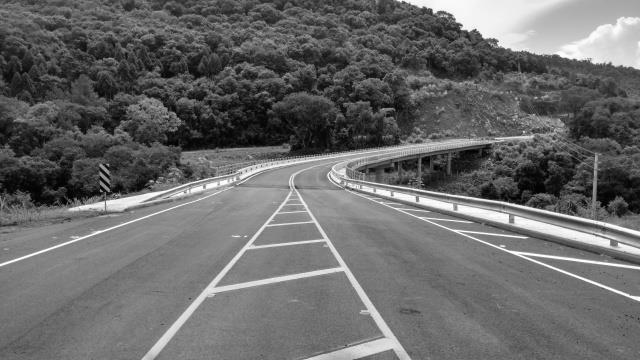

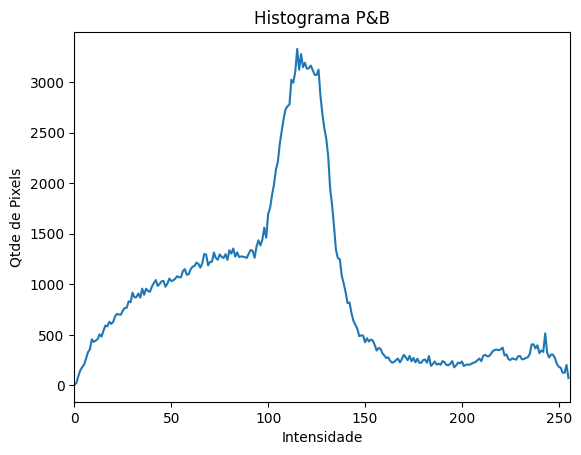

In [ ]:
img = cv2.imread('/content/ponte.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #converte P&B
cv2_imshow(img)

#Função calcHist para calcular o histograma da imagem
h = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.figure()
plt.title("Histograma P&B")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.plot(h)
plt.xlim([0, 256])
plt.show()

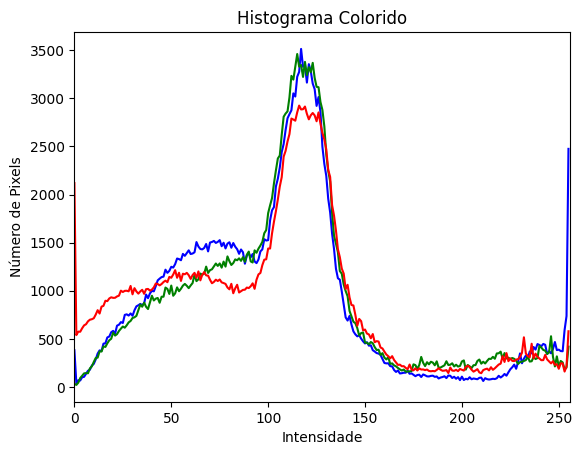

In [ ]:
img = cv2.imread('/content/ponte.png')

#Separa os canais
canais = cv2.split(img)
cores = ("b", "g", "r")
plt.figure()
plt.title("Histograma Colorido")
plt.xlabel("Intensidade")
plt.ylabel("Número de Pixels")
for (canal, cor) in zip(canais, cores):
  #Este loop executa 3 vezes, uma para cada canal
  hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
  plt.plot(hist, color = cor)
  plt.xlim([0, 256])
plt.show()

##Equalização de Histograma

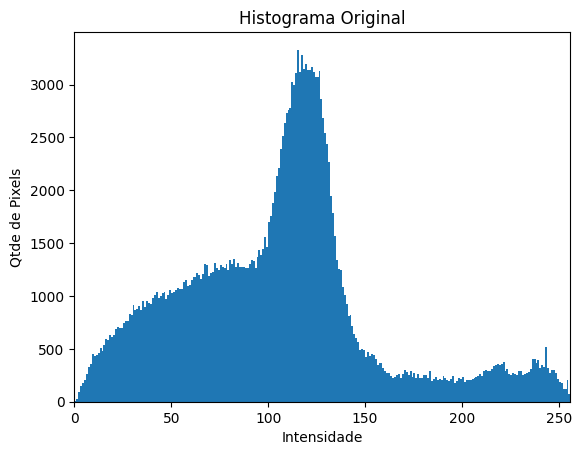

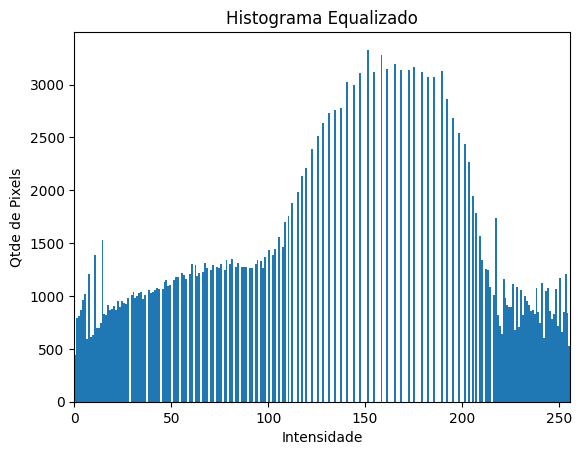

In [ ]:
img = cv2.imread('/content/ponte.png', cv2.IMREAD_GRAYSCALE)
h_eq = cv2.equalizeHist(img)

plt.figure()
plt.title("Histograma Original")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(img.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()

plt.figure()
plt.title("Histograma Equalizado")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(h_eq.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()

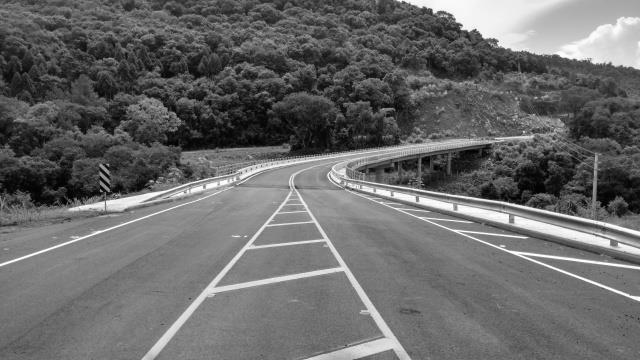

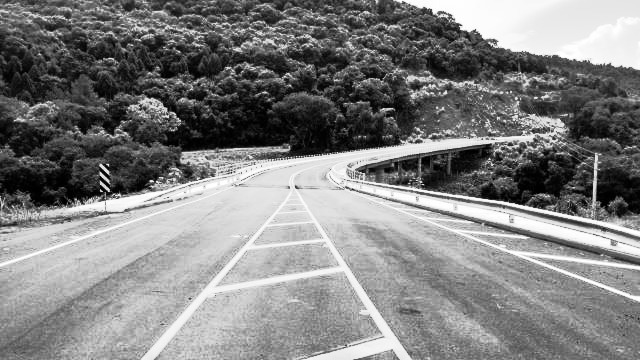

In [ ]:
cv2_imshow(img)
cv2_imshow(h_eq)

[Documentação oficial do OpenCV mostrando exemplo de uma imagem de baixo contraste equalizada](http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html)

Imagem Original de Baixo Contraste:


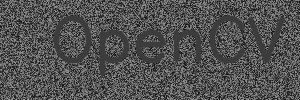

Imagem Após Equalização de Histograma:


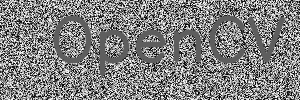

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Importação necessária para Google Colab

# Passo 1: Criar uma matriz de baixo contraste
img = np.random.randint(20, 150, (100, 300), dtype=np.uint8)
# Passo 2: Adicionar o texto "OpenCV" na imagem
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', (50, 60), font, 2, (60,), 3, cv2.LINE_AA)  # Texto com contraste ligeiramente maior

# Mostrar a imagem de baixo contraste
print("Imagem Original de Baixo Contraste:")
cv2_imshow(img)

# Passo 3: Equalizar o histograma da imagem
img_equalizada = cv2.equalizeHist(img)

# Mostrar a imagem após equalização
print("Imagem Após Equalização de Histograma:")
cv2_imshow(img_equalizada)